# MLOps Nedir? - Temel Kavramlar

## 🎯 Bu Bölümde Öğrenecekleriniz:
- MLOps'un tanımı ve önemi
- Geleneksel ML ile MLOps arasındaki farklar
- MLOps yaşam döngüsü
- Temel araçlar ve teknolojiler

---

## 1. MLOps Nedir?

**MLOps (Machine Learning Operations)**, makine öğrenmesi modellerinin geliştirme, dağıtım ve bakımını otomatikleştiren bir dizi uygulamadır.

### Temel Bileşenler:
- **Development (Geliştirme)**: Model tasarımı ve eğitimi
- **Operations (Operasyonlar)**: Model dağıtımı ve izleme
- **Infrastructure (Altyapı)**: Ölçeklenebilir sistemler

### Neden MLOps?
1. **Hızlı Dağıtım**: Modelleri hızla üretime alma
2. **Güvenilirlik**: Tutarlı ve tekrarlanabilir süreçler
3. **Ölçeklenebilirlik**: Büyük ölçekte model yönetimi
4. **İşbirliği**: Veri bilimciler ve mühendisler arası koordinasyon

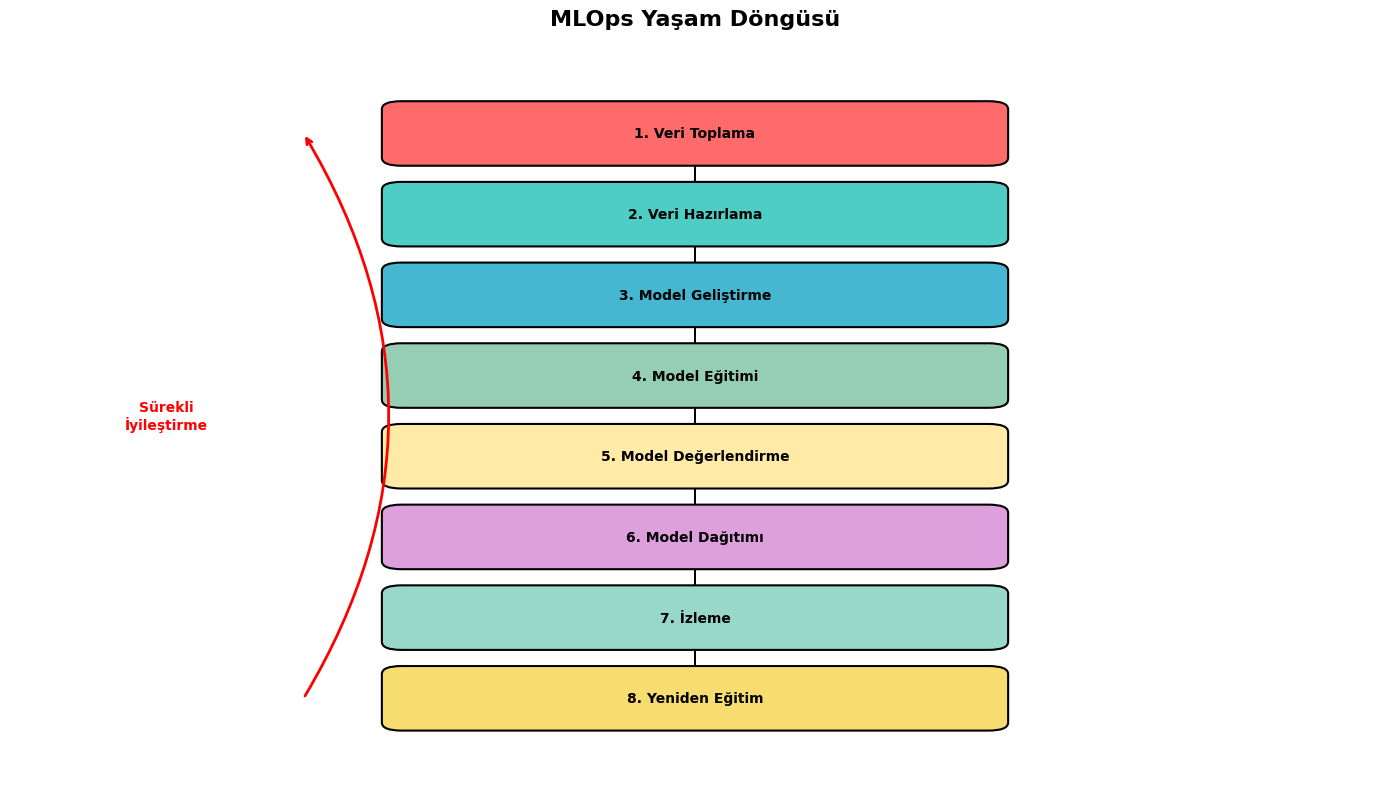

In [2]:
# MLOps sürecini görselleştirmek için basit bir diagram
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# MLOps süreç adımları
steps = [
    "Veri Toplama",
    "Veri Hazırlama", 
    "Model Geliştirme",
    "Model Eğitimi",
    "Model Değerlendirme",
    "Model Dağıtımı",
    "İzleme",
    "Yeniden Eğitim"
]

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']

# Kutular oluştur
y_positions = [6, 5, 4, 3, 2, 1, 0, -1]
x_position = 2

for i, (step, color, y) in enumerate(zip(steps, colors, y_positions)):
    # Ana kutu
    box = FancyBboxPatch((x_position, y-0.3), 3, 0.6, 
                        boxstyle="round,pad=0.1", 
                        facecolor=color, 
                        edgecolor='black',
                        linewidth=1.5)
    ax.add_patch(box)
    
    # Text
    ax.text(x_position + 1.5, y, f"{i+1}. {step}", 
           ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Ok çiz (son adım hariç)
    if i < len(steps) - 1:
        ax.arrow(x_position + 1.5, y-0.4, 0, -0.3, 
                head_width=0.1, head_length=0.1, fc='black', ec='black')

# Geri döngü oku (Son adımdan ilk adıma)
ax.annotate('', xy=(x_position - 0.5, 6), xytext=(x_position - 0.5, -1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', 
                          color='red', lw=2))
ax.text(x_position - 1.2, 2.5, 'Sürekli\nİyileştirme', 
       ha='center', va='center', fontsize=10, color='red', fontweight='bold')

ax.set_xlim(0, 7)
ax.set_ylim(-2, 7)
ax.set_title('MLOps Yaşam Döngüsü', fontsize=16, fontweight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

## 2. Geleneksel ML vs MLOps

| Aspect | Geleneksel ML | MLOps |
|--------|---------------|-------|
| **Geliştirme** | Manuel, Ad-hoc | Otomatik, Sistematik |
| **Dağıtım** | Elle yapılan | CI/CD pipeline |
| **İzleme** | Sınırlı | Sürekli monitoring |
| **Versiyon Kontrolü** | Kod için | Kod + Veri + Model |
| **Ölçeklenebilirlik** | Zorlu | Otomatik |
| **Tekrarlanabilirlik** | Düşük | Yüksek |
| **İşbirliği** | Silolar halinde | Cross-functional teams |

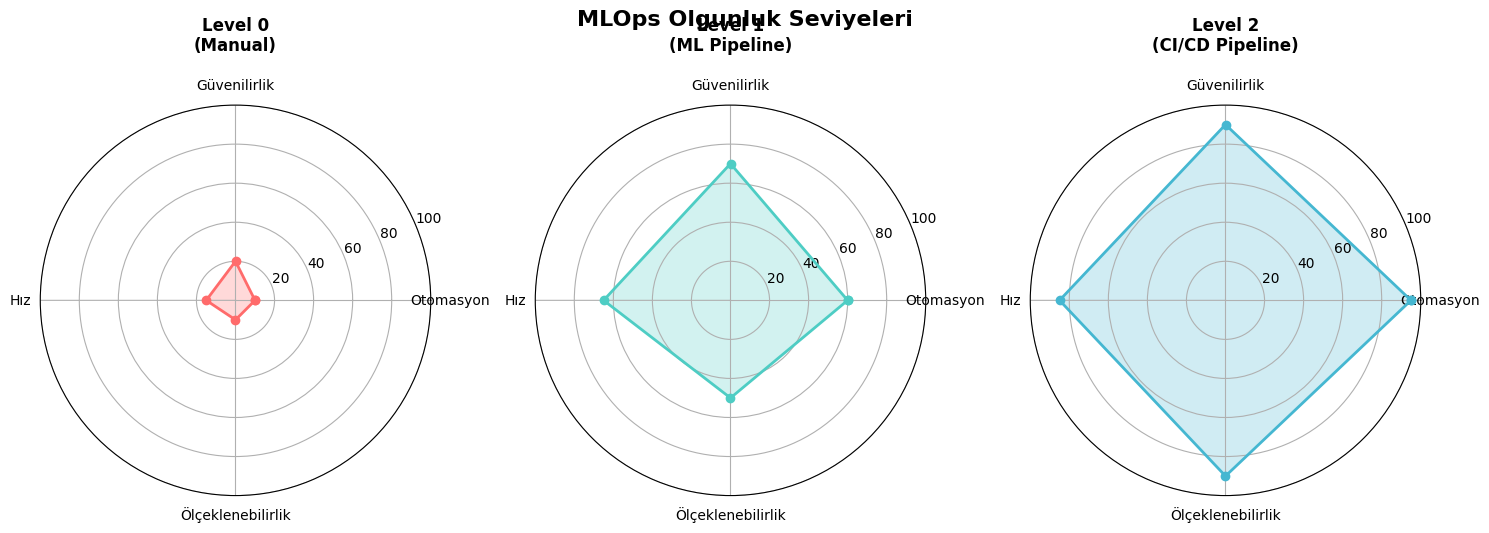

In [3]:
# MLOps maturity seviyelerini göster
import pandas as pd
import seaborn as sns

# MLOps olgunluk seviyeleri
maturity_data = {
    'Seviye': ['Level 0\n(Manual)', 'Level 1\n(ML Pipeline)', 'Level 2\n(CI/CD Pipeline)'],
    'Otomasyon': [10, 60, 95],
    'Güvenilirlik': [20, 70, 90],
    'Hız': [15, 65, 85],
    'Ölçeklenebilirlik': [10, 50, 90]
}

df = pd.DataFrame(maturity_data)

# Radar chart oluştur
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(projection='polar'))
categories = ['Otomasyon', 'Güvenilirlik', 'Hız', 'Ölçeklenebilirlik']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (ax, color) in enumerate(zip(axes, colors)):
    values = [df.iloc[i][cat] for cat in categories]
    values += values[:1]  # Döngüyü tamamla
    
    angles = [n / len(categories) * 2 * 3.14159 for n in range(len(categories))]
    angles += angles[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, color=color)
    ax.fill(angles, values, alpha=0.25, color=color)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 100)
    ax.set_title(df.iloc[i]['Seviye'], fontsize=12, fontweight='bold', pad=20)
    ax.grid(True)

plt.tight_layout()
plt.suptitle('MLOps Olgunluk Seviyeleri', fontsize=16, fontweight='bold', y=1.02)
plt.show()

## 3. MLOps Araçları ve Teknolojiler

### 🔧 Temel Araç Kategorileri:

#### **Veri Yönetimi:**
- **DVC (Data Version Control)**: Veri versiyonlama
- **Apache Airflow**: Veri pipeline orkestrasyon
- **Feast**: Feature store

#### **Model Geliştirme:**
- **MLflow**: ML yaşam döngüsü yönetimi
- **Weights & Biases**: Experiment tracking
- **Neptune**: ML metadata store

#### **Model Dağıtımı:**
- **Docker**: Konteynerizasyon
- **Kubernetes**: Orkestrasyon
- **Seldon Core**: Model serving
- **BentoML**: Model packaging

#### **İzleme ve Monitoring:**
- **Prometheus**: Metrics collection
- **Grafana**: Visualization
- **Evidently**: ML monitoring
- **WhyLabs**: Data quality monitoring

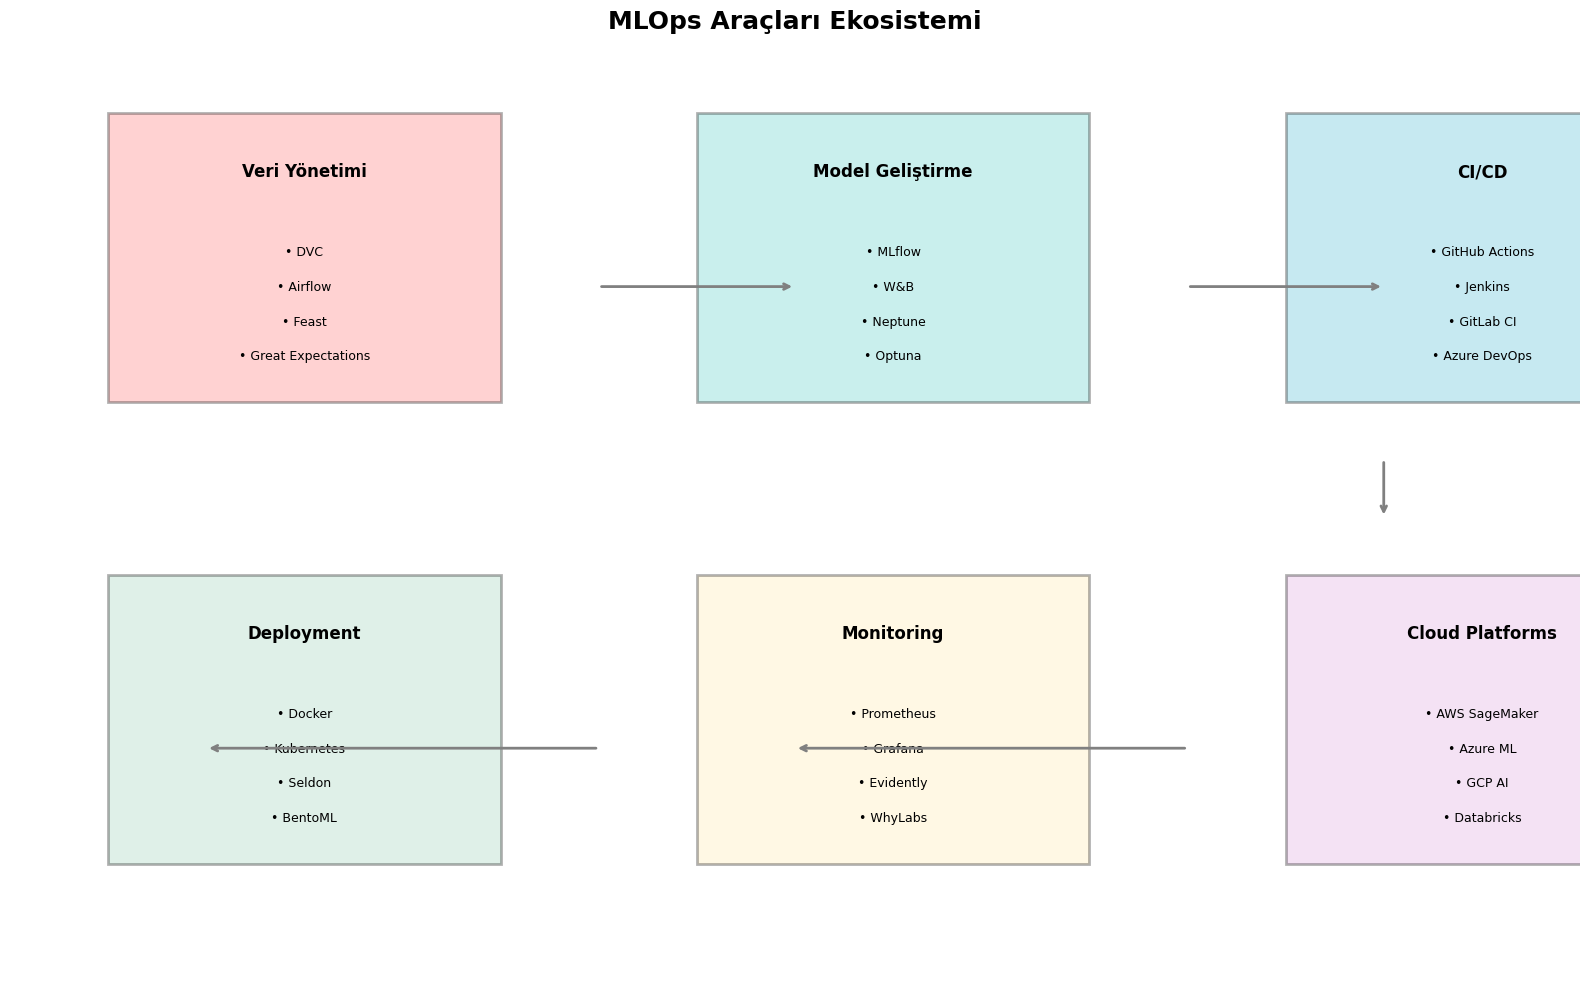

In [4]:
# MLOps araçları ekosistemini görselleştir
import networkx as nx
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# Kategoriler ve araçlar
categories = {
    'Veri Yönetimi': {
        'tools': ['DVC', 'Airflow', 'Feast', 'Great Expectations'],
        'color': '#FF6B6B',
        'position': (2, 8)
    },
    'Model Geliştirme': {
        'tools': ['MLflow', 'W&B', 'Neptune', 'Optuna'],
        'color': '#4ECDC4',
        'position': (8, 8)
    },
    'CI/CD': {
        'tools': ['GitHub Actions', 'Jenkins', 'GitLab CI', 'Azure DevOps'],
        'color': '#45B7D1',
        'position': (14, 8)
    },
    'Deployment': {
        'tools': ['Docker', 'Kubernetes', 'Seldon', 'BentoML'],
        'color': '#96CEB4',
        'position': (2, 4)
    },
    'Monitoring': {
        'tools': ['Prometheus', 'Grafana', 'Evidently', 'WhyLabs'],
        'color': '#FFEAA7',
        'position': (8, 4)
    },
    'Cloud Platforms': {
        'tools': ['AWS SageMaker', 'Azure ML', 'GCP AI', 'Databricks'],
        'color': '#DDA0DD',
        'position': (14, 4)
    }
}

# Her kategori için kutu çiz
for cat_name, cat_info in categories.items():
    x, y = cat_info['position']
    
    # Ana kategori kutusu
    rect = Rectangle((x-1, y-1), 4, 2.5, 
                    facecolor=cat_info['color'], 
                    alpha=0.3, 
                    edgecolor='black',
                    linewidth=2)
    ax.add_patch(rect)
    
    # Kategori başlığı
    ax.text(x+1, y+1, cat_name, ha='center', va='center', 
           fontsize=12, fontweight='bold')
    
    # Araçları listele
    for i, tool in enumerate(cat_info['tools']):
        ax.text(x+1, y+0.3-i*0.3, f"• {tool}", ha='center', va='center', 
               fontsize=9)

# Bağlantı okları
connections = [
    ((6, 8), (8, 8)),  # Veri -> Model
    ((12, 8), (14, 8)), # Model -> CI/CD
    ((14, 6.5), (14, 6)), # CI/CD -> Deployment
    ((12, 4), (8, 4)), # Deployment -> Monitoring
    ((6, 4), (2, 4)), # Monitoring -> Data (feedback)
]

for (x1, y1), (x2, y2) in connections:
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=2, color='gray'))

ax.set_xlim(0, 16)
ax.set_ylim(2, 10)
ax.set_title('MLOps Araçları Ekosistemi', fontsize=18, fontweight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

## 4. İlk MLOps Projesi için Hazırlık

### 🚀 Gerekli Kurulumlar

Bu eğitim boyunca kullanacağımız temel kütüphaneleri kuralım:

## 5. İlk MLOps Denemesi

Basit bir makine öğrenmesi modelini MLOps prensiplerine uygun şekilde geliştirelim:

In [5]:
# Basit bir MLOps örneği
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# MLflow experiment ayarla
mlflow.set_experiment("iris-classification")

with mlflow.start_run():
    # 1. Veri yükleme ve hazırlama
    print("📊 Veri yükleniyor...")
    iris = load_iris()
    X, y = iris.data, iris.target
    
    # Veri setini böl
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # 2. Model parametreleri
    n_estimators = 100
    max_depth = 3
    random_state = 42
    
    # Parametreleri kaydet
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("random_state", random_state)
    
    # 3. Model eğitimi
    print("🤖 Model eğitiliyor...")
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state
    )
    
    model.fit(X_train, y_train)
    
    # 4. Model değerlendirme
    print("📈 Model değerlendiriliyor...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Metrikleri kaydet
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("train_samples", len(X_train))
    mlflow.log_metric("test_samples", len(X_test))
    
    # 5. Model kaydetme
    mlflow.sklearn.log_model(model, "model")
    
    print(f"\n✅ Model eğitimi tamamlandı!")
    print(f"🎯 Doğruluk: {accuracy:.4f}")
    print(f"📊 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

2025/06/28 23:11:01 INFO mlflow.tracking.fluent: Experiment with name 'iris-classification' does not exist. Creating a new experiment.
2025/06/28 23:11:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/28 23:11:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


📊 Veri yükleniyor...
🤖 Model eğitiliyor...
📈 Model değerlendiriliyor...


2025/06/28 23:11:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



✅ Model eğitimi tamamlandı!
🎯 Doğruluk: 1.0000
📊 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 6. MLflow UI'yi Başlatma

MLflow'un web arayüzünü başlatarak experimentlerimizi görselleştirebiliriz:

In [6]:
# MLflow UI başlatma talimatları
print("🌐 MLflow UI'yi başlatmak için terminalde şu komutu çalıştırın:")
print("")
print("mlflow ui")
print("")
print("🔗 Ardından tarayıcınızda şu adresi açın: http://localhost:5000")
print("")
print("📊 Burada experiment'lerinizi, model'lerinizi ve metriklerinizi görebilirsiniz.")

🌐 MLflow UI'yi başlatmak için terminalde şu komutu çalıştırın:

mlflow ui

🔗 Ardından tarayıcınızda şu adresi açın: http://localhost:5000

📊 Burada experiment'lerinizi, model'lerinizi ve metriklerinizi görebilirsiniz.


## 🎯 Özet ve Sıradaki Adımlar

### Bu Bölümde Öğrendiklerimiz:
1. ✅ MLOps'un tanımı ve önemi
2. ✅ Geleneksel ML ile MLOps arasındaki farklar
3. ✅ MLOps yaşam döngüsü
4. ✅ Temel araçlar ve teknolojiler
5. ✅ İlk MLflow experiment'i

### 🚀 Sıradaki Level: Data Pipeline
Bir sonraki seviyede şunları öğreneceğiz:
- Veri versiyonlama (DVC)
- Veri kalitesi kontrolü
- Feature engineering pipeline'ları
- Veri drift detection

### 📚 Ek Kaynaklar:
- [MLflow Documentation](https://mlflow.org/docs/latest/index.html)
- [Google MLOps Guide](https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning)
- [MLOps Community](https://mlops.community/)

---
**🎉 Tebrikler! MLOps yolculuğunuzun ilk adımını tamamladınız!**